In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
original = pd.read_csv("C:\\Users\\user\\Desktop\\StressLevelDataset.csv")
train = pd.read_csv("C:\\Users\\user\\Desktop\\train.csv")
test = pd.read_csv("C:\\Users\\user\\Desktop\\test.csv")

In [4]:
# 원본 데이터는 1100 rows * 21columns 로 구성되어있음.
original

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [5]:
# 훈련 데이터는 880 rows × 21 columns 로 구성되어있음.
train

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,3,30,0,6,1,2,4,1,1,4,...,4,4,2,5,1,3,2,2,1,0
1,10,18,1,9,3,1,2,4,3,3,...,3,2,2,2,3,3,2,3,3,1
2,1,29,0,7,1,2,5,1,1,4,...,5,5,1,4,1,3,2,1,1,0
3,11,15,1,9,2,1,2,4,3,3,...,2,3,3,3,2,3,3,2,2,1
4,15,14,1,19,3,3,1,3,3,1,...,2,1,4,1,5,1,4,4,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,10,17,0,13,3,1,2,4,2,2,...,3,2,3,3,2,3,2,2,3,1
876,9,17,0,13,2,1,2,4,3,3,...,2,2,3,3,3,3,3,3,3,1
877,16,9,1,27,5,3,1,5,4,1,...,2,1,4,2,5,1,4,4,5,2
878,18,6,1,23,5,3,1,5,4,2,...,1,1,3,2,4,1,5,4,5,2


In [5]:
# 테스트 데이터는 220 rows × 21 columns 로 구성되어있음.
test

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,12,16,0,7,5,3,2,4,3,0,...,4,5,0,0,5,1,2,3,3,0
1,21,1,1,19,5,3,1,3,5,2,...,1,1,3,1,5,1,5,4,4,2
2,21,5,1,17,5,3,1,3,3,1,...,1,1,5,2,5,1,5,5,4,2
3,5,9,1,6,4,3,5,3,4,0,...,2,0,0,2,5,0,3,4,0,1
4,2,25,0,4,1,2,4,1,1,3,...,5,5,1,5,1,3,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,11,21,0,9,3,1,3,4,3,2,...,3,2,3,2,2,2,2,2,3,1
216,17,10,1,16,5,3,1,3,4,2,...,1,1,4,1,5,1,4,5,5,2
217,8,28,0,8,1,2,5,2,2,4,...,5,4,2,4,1,3,1,2,1,0
218,0,27,0,22,4,3,3,2,4,3,...,5,5,5,2,0,1,2,5,0,2


In [6]:
original

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [8]:
import scipy.stats as stats

anxiety = original['anxiety_level']
self = original['self_esteem']
depression = original['depression']
stress = original['stress_level']

# Grouping ages by disease_status
group0 = [anxiety[i] for i in range(len(anxiety)) if stress[i] == 0]
group1 = [anxiety[i] for i in range(len(anxiety)) if stress[i] == 1]
group2 = [anxiety[i] for i in range(len(anxiety)) if stress[i] == 2]

# Performing ANOVA
f_stat, p_val = stats.f_oneway(group0, group1, group2)
f_stat, p_val

(655.4532247210961, 5.2967461680520876e-188)

In [9]:
# Grouping ages by disease_status
group0 = [self[i] for i in range(len(self)) if stress[i] == 0]
group1 = [self[i] for i in range(len(self)) if stress[i] == 1]
group2 = [self[i] for i in range(len(self)) if stress[i] == 2]

# Performing ANOVA
f_stat, p_val = stats.f_oneway(group0, group1, group2)
f_stat, p_val

(775.3861302433628, 1.2685593639570908e-210)

In [11]:
# Grouping ages by disease_status
group0 = [depression[i] for i in range(len(depression)) if stress[i] == 0]
group1 = [depression[i] for i in range(len(depression)) if stress[i] == 1]
group2 = [depression[i] for i in range(len(depression)) if stress[i] == 2]

# Performing ANOVA
f_stat, p_val = stats.f_oneway(group0, group1, group2)
f_stat, p_val

(652.629286539658, 1.920442374363831e-187)

In [ ]:
h0= 스트레스 범주에 따라 불안감,자존감,우울증 차이가 있다
즉 스트레스 범주와 불안감, 자존감,우울증은 연관이 있다.

In [9]:
# 원본 데이터의 상관관계 - 범주형 데이터이기 때문에 cramer_v를 사용
# 연속형 변수인 'anxiety_level', 'self_esteem','depression'를 제외함.
original = original.drop(columns=['anxiety_level', 'self_esteem','depression'])
original

,mental_health_history,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,0,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,1,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,1,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,1,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,0,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,3,1,3,2,2,2,2,3,2,2,2,3,3,2,3,3,1
1096,0,0,3,0,0,0,1,3,4,0,1,1,1,1,3,4,3,2
1097,0,1,2,5,2,2,3,4,4,5,1,4,1,3,1,2,1,0
1098,1,5,3,1,4,3,1,1,1,2,5,1,4,1,4,4,4,2


In [10]:
from scipy.stats import chi2_contingency


def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

def cramers_v_matrix(df):
    columns = df.columns
    n = len(columns)
    cramers_v_matrix = pd.DataFrame(np.zeros((n, n)), index=columns, columns=columns)

    for i in range(n):
        for j in range(i, n):
            if i == j:
                cramers_v_matrix.iloc[i, j] = 1.0
            else:
                confusion_matrix = pd.crosstab(df.iloc[:, i], df.iloc[:, j])
                cramers_v_matrix.iloc[i, j] = cramers_v(confusion_matrix)
                cramers_v_matrix.iloc[j, i] = cramers_v_matrix.iloc[i, j]
    
    return cramers_v_matrix

In [11]:
v_matrix = cramers_v_matrix(original)
print(v_matrix)

                              mental_health_history  headache  blood_pressure  \
mental_health_history                      1.000000  0.660759        0.641326   
headache                                   0.660759  1.000000        0.821212   
blood_pressure                             0.641326  0.821212        1.000000   
sleep_quality                              0.696803  0.485721        0.838888   
breathing_problem                          0.588068  0.363967        0.667661   
noise_level                                0.593808  0.372256        0.677107   
living_conditions                          0.561208  0.367052        0.631836   
safety                                     0.619862  0.430587        0.753985   
basic_needs                                0.653876  0.436336        0.752018   
academic_performance                       0.643845  0.430927        0.747449   
study_load                                 0.585832  0.377050        0.665623   
teacher_student_relationship

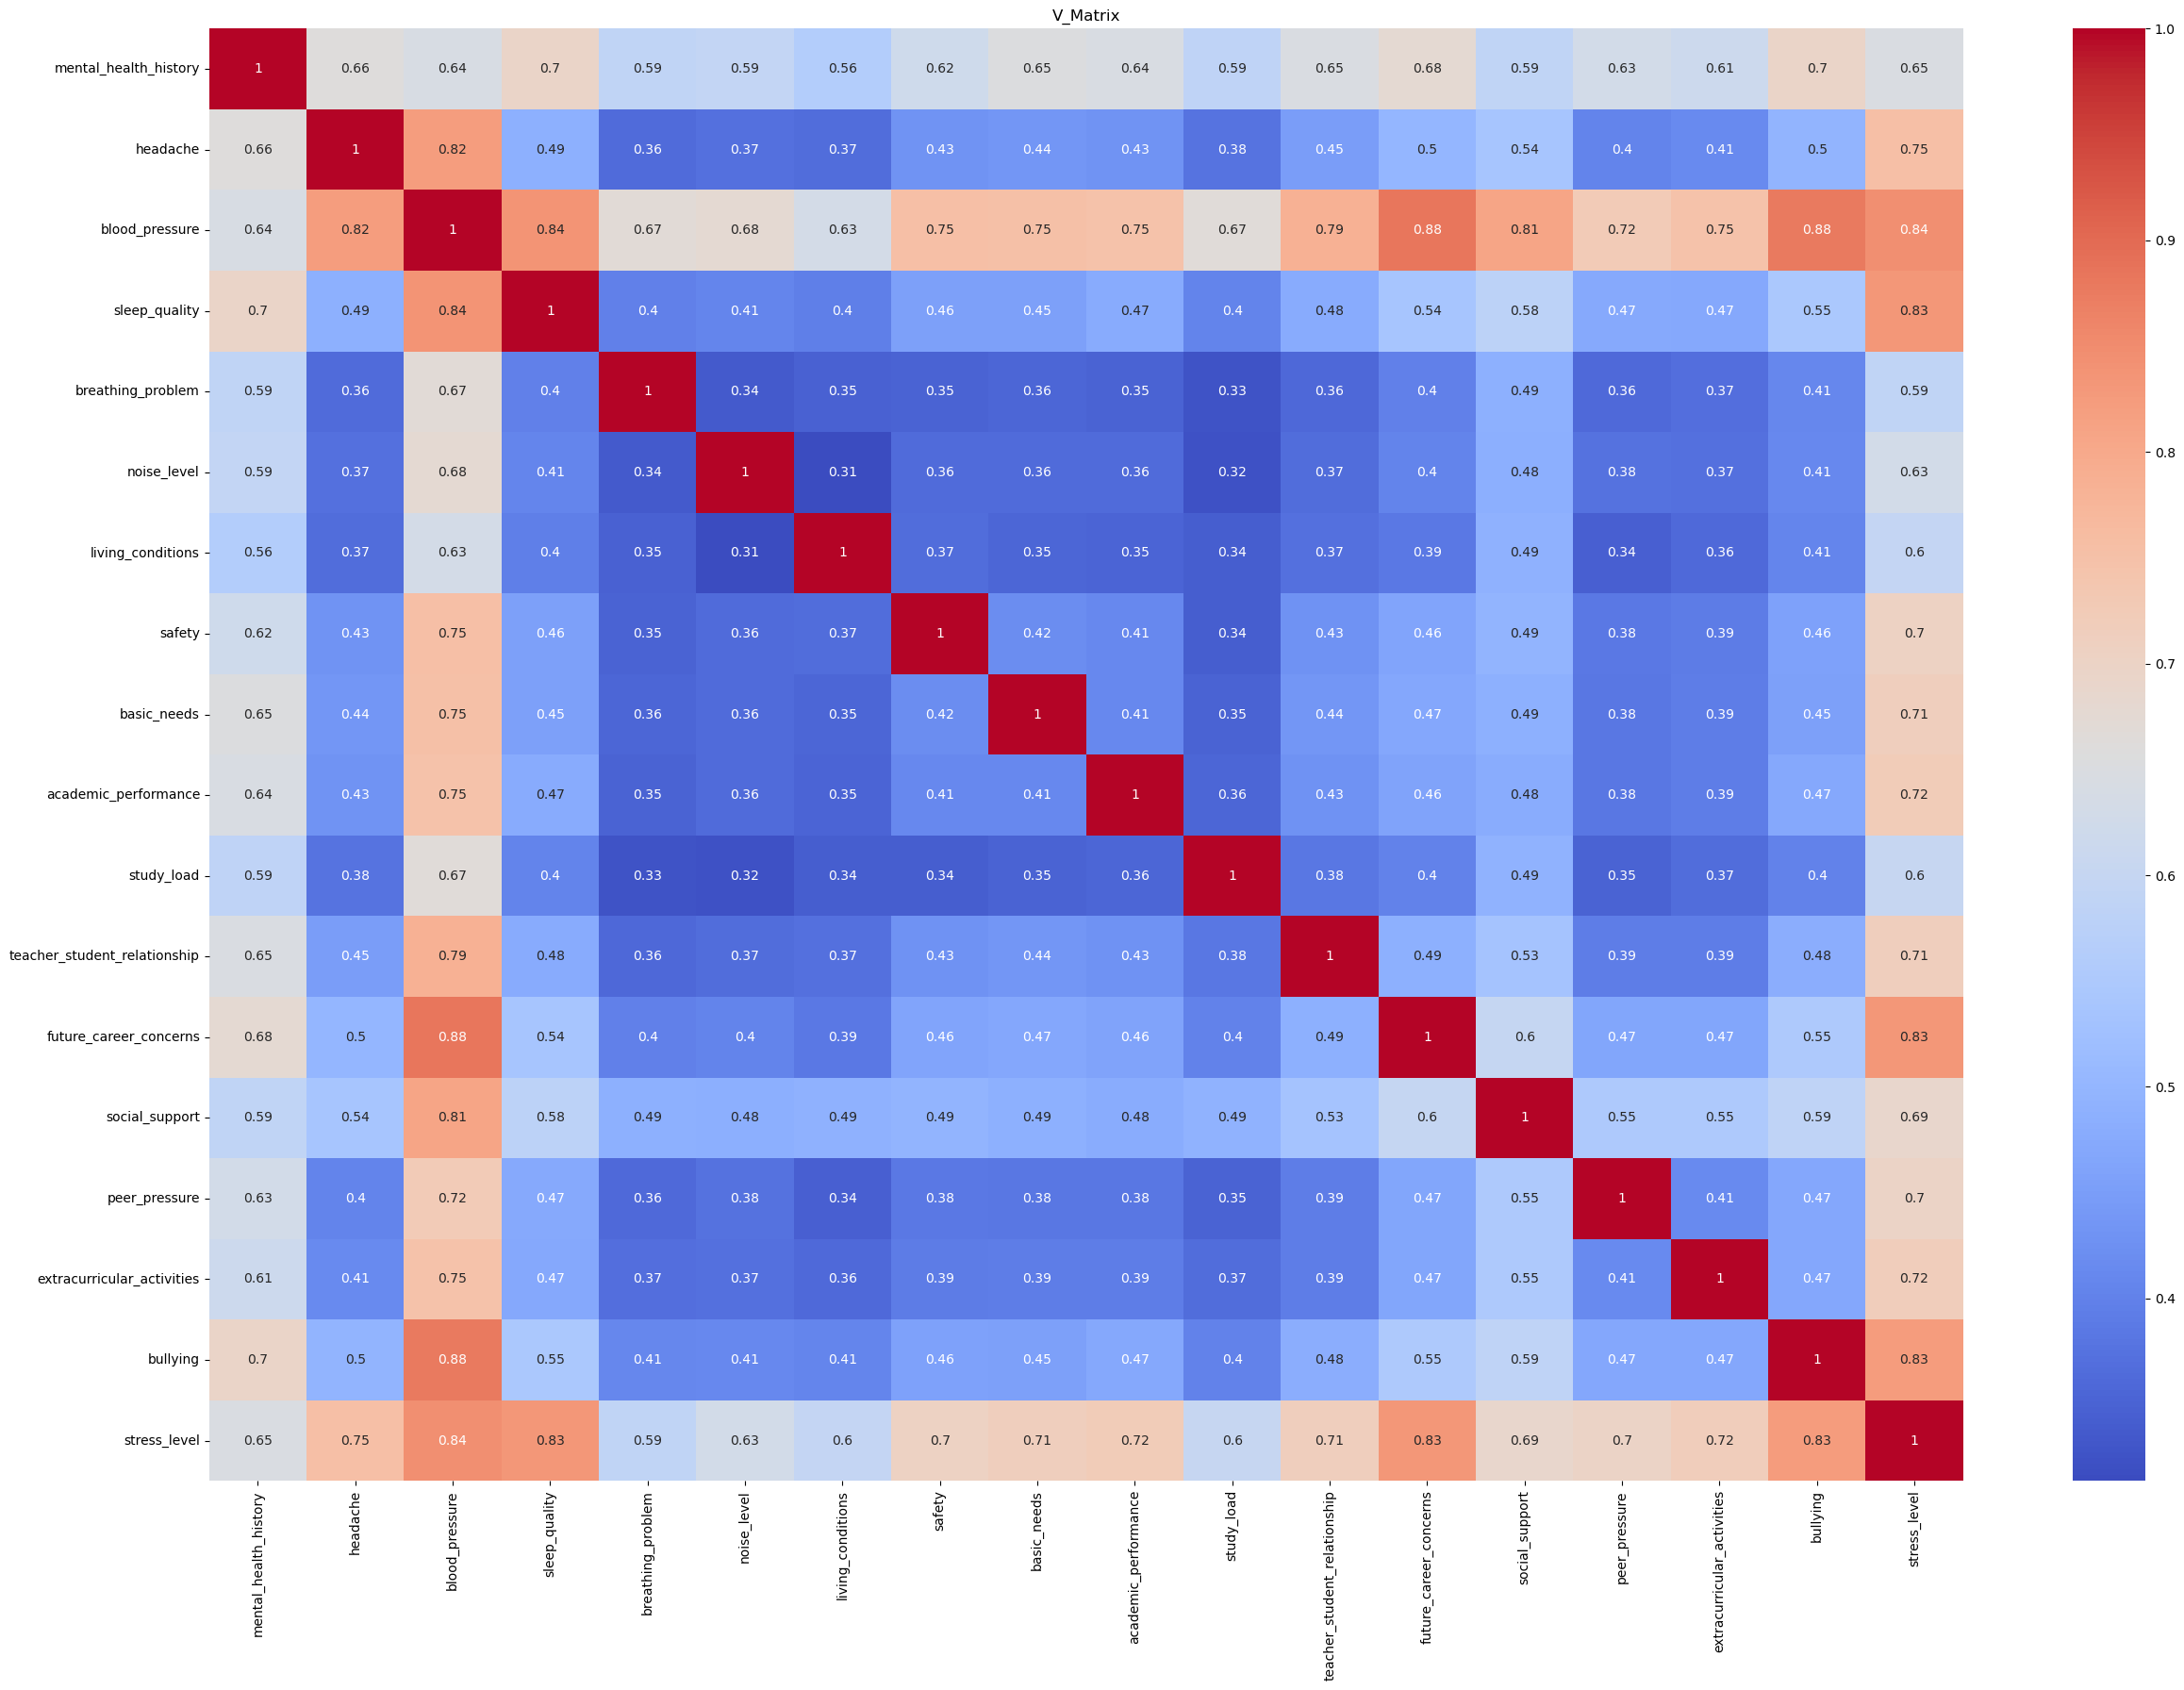

In [12]:
plt.figure(figsize=(30, 20))
sns.heatmap(v_matrix, annot=True, cmap='coolwarm')
plt.title('V_Matrix')
plt.show()

In [7]:
input = train.drop(columns=['stress_level'])
target = train['stress_level']

In [8]:
train_input, val_input, train_target, val_target = train_test_split(input,
                                                                    target,
                                                                    test_size=0.2,
                                                                    random_state=27)

In [9]:
# 다중로지스틱
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lrt_scores = []
lrv_scores = []

for _ in range(10):
    lr.fit(train_input, train_target)
    lrtscore = lr.score(train_input, train_target)
    lrvscore = lr.score(val_input, val_target)
    lrt_scores.append(lrtscore)
    lrv_scores.append(lrvscore)

lr_train = np.mean(lrt_scores)
lr_val = np.mean(lrv_scores)

c:\ProgramData\anaconda3\envs\ML2\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\envs\ML2\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [10]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_input)
train_input_scaled = ss.transform(train_input)
val_input_scaled = ss.transform(val_input)

lrt_scores = []
lrv_scores = []

for _ in range(10):
    lr.fit(train_input_scaled, train_target)
    lrtscore = lr.score(train_input_scaled, train_target)
    lrvscore = lr.score(val_input_scaled, val_target)
    lrt_scores.append(lrtscore)
    lrv_scores.append(lrvscore)

lr_train = np.mean(lrt_scores)
lr_val = np.mean(lrv_scores)

In [11]:
print(lr_train)
print(lr_val)

0.9289772727272728
0.8693181818181819


In [12]:
# 확률적 경사 하강법
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

sgt_scores = []
sgv_scores = []

for _ in range(10):
    sc.fit(train_input_scaled, train_target)
    sgtscore = sc.score(train_input_scaled, train_target)
    sgvscore = sc.score(val_input_scaled, val_target)
    sgt_scores.append(sgtscore)
    sgv_scores.append(sgvscore)

SGD_train = np.mean(sgt_scores)
SGD_val = np.mean(sgv_scores)

c:\ProgramData\anaconda3\envs\ML2\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\ProgramData\anaconda3\envs\ML2\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\ProgramData\anaconda3\envs\ML2\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\ProgramData\anaconda3\envs\ML2\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\ProgramData\anaconda3

In [13]:
# RF
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rft_scores = []
rfv_scores = []

for _ in range(10):
    rf.fit(train_input, train_target)
    rftscore = rf.score(train_input, train_target)
    rfvscore = rf.score(val_input, val_target)
    rft_scores.append(rftscore)
    rfv_scores.append(rfvscore)

rf_train = np.mean(sgt_scores)
rf_val = np.mean(sgv_scores)

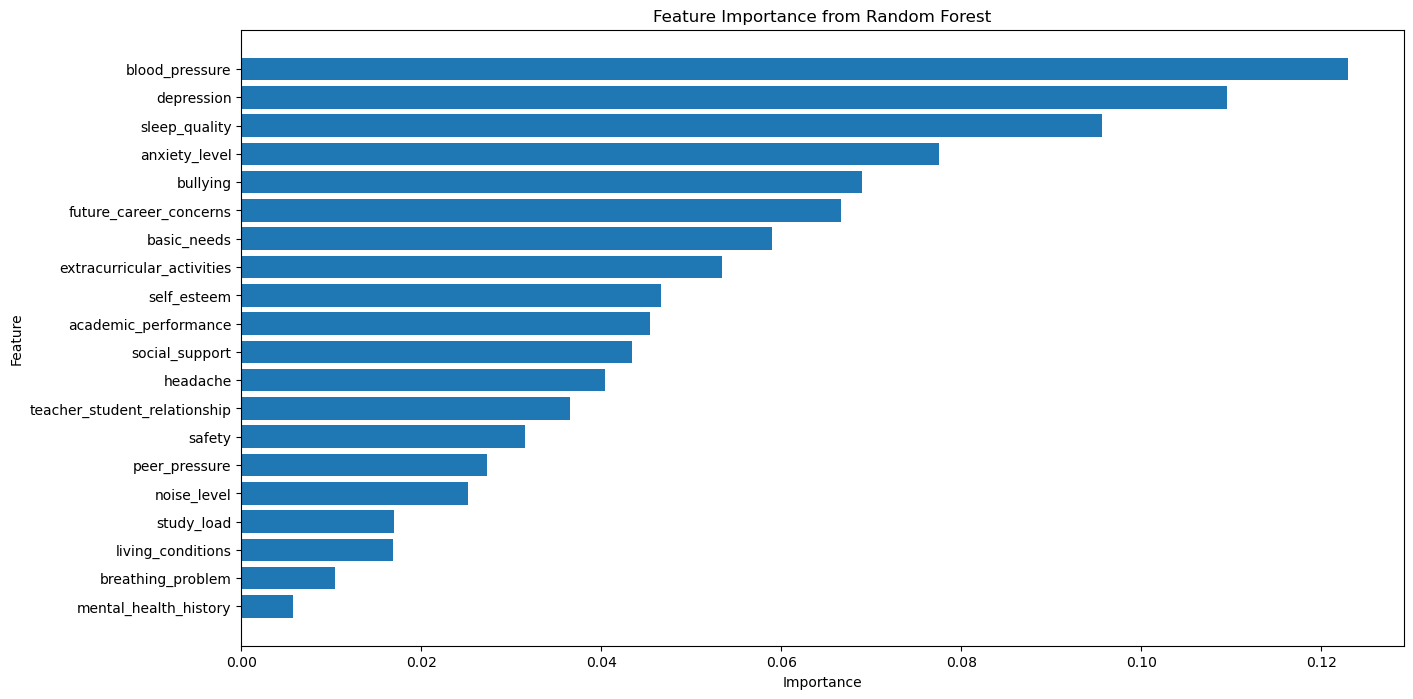

,Feature,Importance
5,blood_pressure,0.122993
3,depression,0.109526
6,sleep_quality,0.095580
0,anxiety_level,0.077531
19,bullying,0.068960
15,future_career_concerns,0.066649
11,basic_needs,0.058980
18,extracurricular_activities,0.053408
1,self_esteem,0.046587
12,academic_performance,0.045429


In [14]:
importances = rf.feature_importances_
feature_names = input.columns

# Importance 열을 기준으로 내림차순(큰 값에서 작은 값 순서로) 정렬
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
# 특성 중요도 시각화
plt.figure(figsize=(15, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

importance_df

In [15]:
# RF(Grid search)
import numpy as np
param_grid = {
    'max_depth': range(5, 30, 2),  # Smaller range and step size
    'min_samples_split': range(2, 10, 2),  # Smaller range and step size
    'min_samples_leaf': range(1, 10, 2),  # Smaller range and step size
    'min_impurity_decrease': np.logspace(-3, -2, 5)  # Fewer values
}


In [16]:
from sklearn.model_selection import GridSearchCV
# 그리드서치로 최적의 하이퍼파라미터 찾기
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(train_input, train_target)

Fitting 2 folds for each of 1300 candidates, totalling 2600 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 30, 2),
                         'min_impurity_decrease': array([0.001     , 0.00177828, 0.00316228, 0.00562341, 0.01      ]),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)},
             verbose=2)

In [17]:
# 최적의 하이퍼파라미터 찾기
best_rf = grid_search.best_estimator_

# 하이퍼파라미터 튜닝 후 최적의 랜덤 포레스트 모델의 정확도
rf_gs_train = best_rf.score(train_input, train_target)
rf_gs_val = best_rf.score(val_input, val_target)

In [18]:
# RF(Random search)
from scipy.stats import uniform, randint
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20,50),
          'min_samples_split': randint(2,25),
          'min_samples_leaf': randint(1,25)
          }
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(RandomForestClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42) #n_iter = 반복을 몇번 할 것인지(sample을 100번 하곘다.)
rs.fit(train_input, train_target)

best_rs_rf = rs.best_estimator_

rf_rs_train = best_rs_rf.score(train_input, train_target)
rf_rs_val = best_rs_rf.score(val_input, val_target)

print(rf_rs_train)
print(rf_rs_val)

0.9815340909090909
0.8693181818181818


In [19]:
# DT
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dtt_scores = []
dtv_scores = []

for _ in range(10):
    dt.fit(train_input, train_target)
    dttscore = dt.score(train_input, train_target)
    dtvscore = dt.score(val_input, val_target)
    dtt_scores.append(dttscore)
    dtv_scores.append(dtvscore)

dt_train = np.mean(dtt_scores)
dt_val = np.mean(dtv_scores)


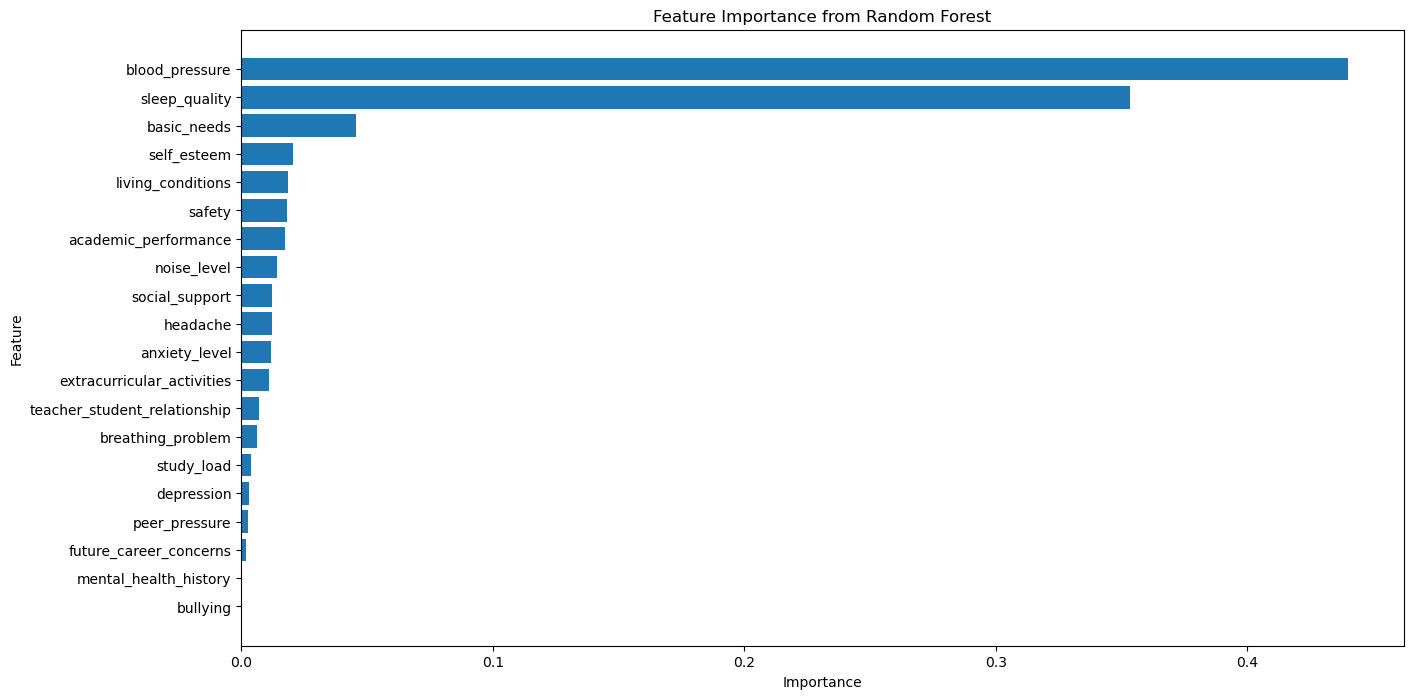

,Feature,Importance
5,blood_pressure,0.440207
6,sleep_quality,0.353238
11,basic_needs,0.045601
1,self_esteem,0.020490
9,living_conditions,0.018429
10,safety,0.018269
12,academic_performance,0.017290
8,noise_level,0.014031
16,social_support,0.012378
4,headache,0.012058


In [20]:
dtimportances = dt.feature_importances_
dtfeature_names = input.columns

# Importance 열을 기준으로 내림차순(큰 값에서 작은 값 순서로) 정렬
dtimportance_df = pd.DataFrame({
    'Feature': dtfeature_names,
    'Importance': dtimportances
}).sort_values(by='Importance', ascending=False)
# 특성 중요도 시각화
plt.figure(figsize=(15, 8))
plt.barh(dtimportance_df['Feature'], dtimportance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

dtimportance_df

In [21]:
# DT(Grid search)
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

best_dt_gs = gs.best_estimator_

dt_gs_train = best_dt_gs.score(train_input, train_target)
dt_gs_val = best_dt_gs.score(val_input, val_target)

In [22]:
# DT(Random search)
from scipy.stats import uniform, randint
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20,50),
          'min_samples_split': randint(2,25),
          'min_samples_leaf': randint(1,25)
          }

In [23]:
rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42) #n_iter = 반복을 몇번 할 것인지(sample을 100번 하곘다.)
rs.fit(train_input, train_target)

best_rs_dt = rs.best_estimator_

dt_rs_train = best_rs_dt.score(train_input, train_target)
dt_rs_val = best_rs_dt.score(val_input, val_target)

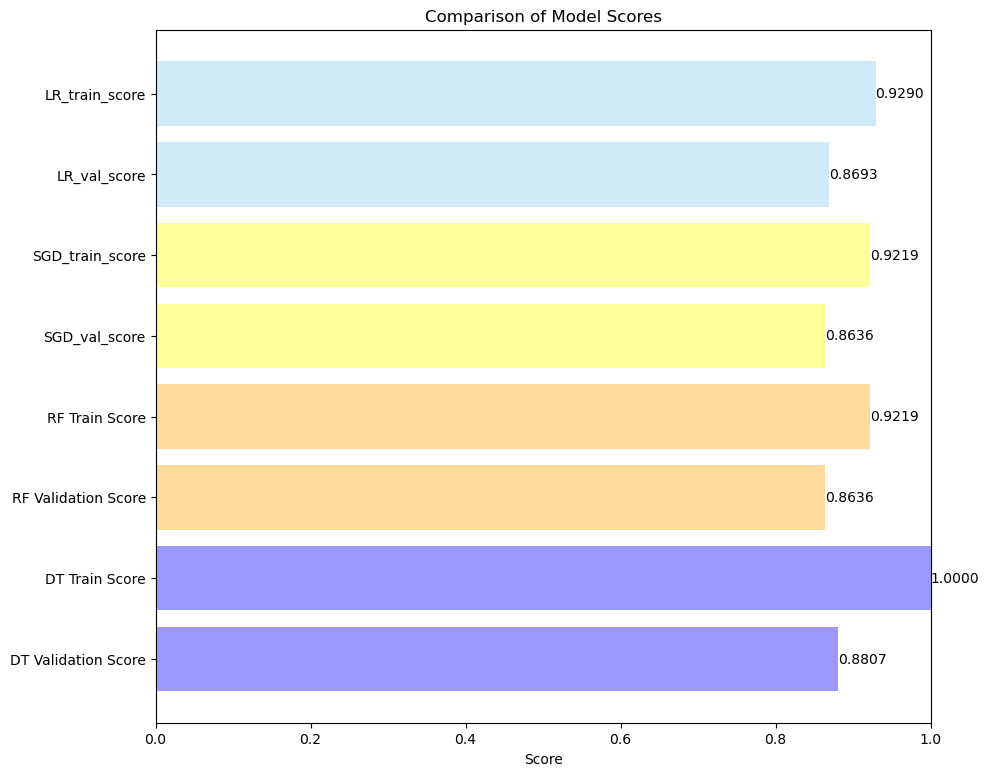

In [45]:
# visualizaition
labels = ['LR_train_score', 'LR_val_score', 'SGD_train_score', 'SGD_val_score', 'RF Train Score', 'RF Validation Score',
          'DT Train Score', 'DT Validation Score']
scores = [lr_train, lr_val, SGD_train, SGD_val, rf_train, rf_val, dt_train, dt_val]
# 그래프 설정
plt.figure(figsize=(10, 9))
# 가로 막대 그래프 그리기
plt.barh(labels, scores, color=['skyblue', 'skyblue', 'yellow', 'yellow', 'orange', 'orange', 'blue', 'blue'], alpha = 0.4)
# 축 설정
plt.xlim(0, 1)
plt.xlabel('Score')
plt.title('Comparison of Model Scores')
# 점수 표시
for index, score in enumerate(scores):
    plt.text(score, index, f'{score:.4f}', ha='left', va='center', color='black')
# 그리드 설정
plt.grid(False)
plt.gca().invert_yaxis()  # y축 반전 (기존과 동일한 순서를 유지하기 위해)
plt.show()

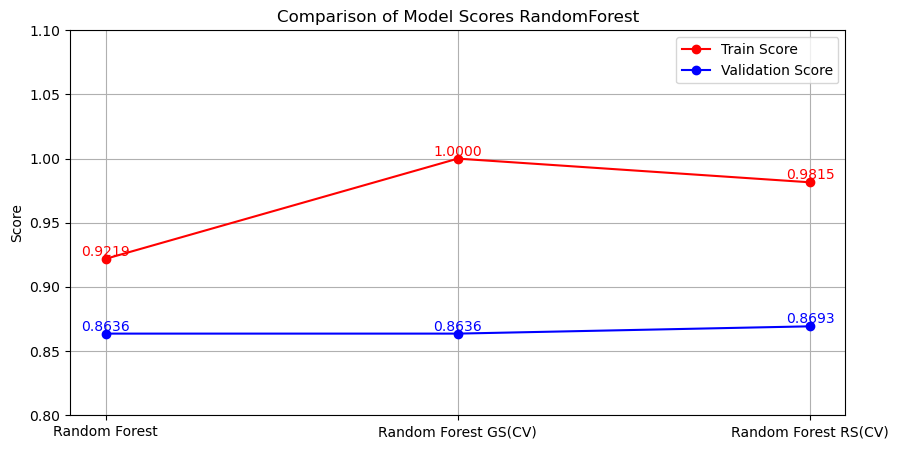

In [39]:
# Randomforest
# 데이터 준비
models = ['Random Forest', 'Random Forest GS(CV)','Random Forest RS(CV)',]
train_scores = [rf_train, rf_gs_train, rf_rs_train, ]
val_scores = [rf_val, rf_gs_val, rf_rs_val, ]
# 그래프 설정
plt.figure(figsize=(10, 5))
# 그래프 그리기
x = range(len(models))
plt.plot(x, train_scores, marker='o', color='red', label='Train Score')
plt.plot(x, val_scores, marker='o', color='blue', label='Validation Score')
# 축 설정
plt.ylim(0.8, 1.1)
plt.ylabel('Score')
plt.title('Comparison of Model Scores RandomForest')
plt.xticks(x, models)
# 점수 표시
for i in x:
    plt.text(i, train_scores[i], f'{train_scores[i]:.4f}', ha='center', va='bottom', color='red')
    plt.text(i, val_scores[i], f'{val_scores[i]:.4f}', ha='center', va='bottom', color='blue')
# 그리드 및 레전드 설정
plt.grid(True)
plt.legend()
plt.show()

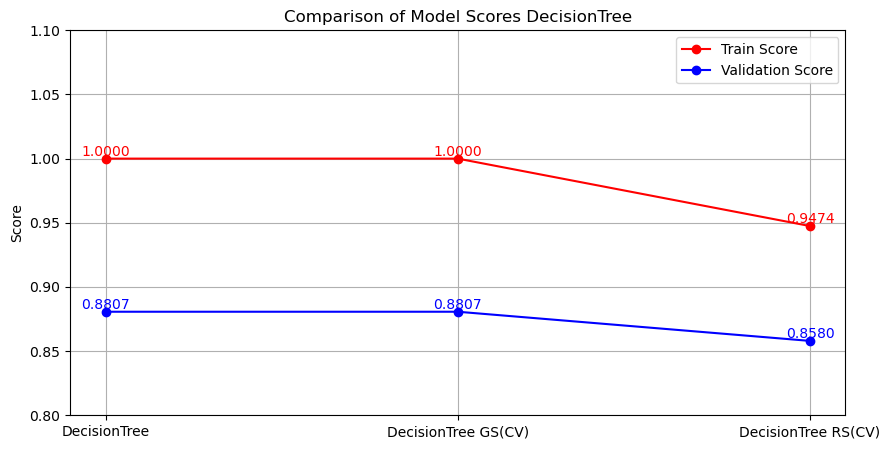

In [40]:
# Dicision tree
# 데이터 준비
models = ['DecisionTree', 'DecisionTree GS(CV)','DecisionTree RS(CV)',]
train_scores = [dt_train, dt_gs_train, dt_rs_train, ]
val_scores = [dt_val, dt_gs_val, dt_rs_val, ]
# 그래프 설정
plt.figure(figsize=(10, 5))
# 그래프 그리기
x = range(len(models))
plt.plot(x, train_scores, marker='o', color='red', label='Train Score')
plt.plot(x, val_scores, marker='o', color='blue', label='Validation Score')
# 축 설정
plt.ylim(0.8, 1.1)
plt.ylabel('Score')
plt.title('Comparison of Model Scores DecisionTree')
plt.xticks(x, models)
# 점수 표시
for i in x:
    plt.text(i, train_scores[i], f'{train_scores[i]:.4f}', ha='center', va='bottom', color='red')
    plt.text(i, val_scores[i], f'{val_scores[i]:.4f}', ha='center', va='bottom', color='blue')
# 그리드 및 레전드 설정
plt.grid(True)
plt.legend()
plt.show()

In [26]:
# test
test_input = test.drop(columns=['stress_level'])
test_target = test['stress_level']

In [27]:
scores = []
for _ in range(10):
    best_rs_rf.fit(train_input, train_target)
    score = best_rs_rf.score(test_input, test_target)
    scores.append(score)
final_score = np.mean(scores)
print(final_score)

0.8545454545454545
